<a href="https://colab.research.google.com/github/RanjuRamya/Emotiondetect/blob/main/EmotionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
!unzip train.zip?dl=0

--2024-06-24 11:02:06--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=0 [following]
--2024-06-24 11:02:07--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7d7abdb5349bce71b2ff492d0.dl.dropboxusercontent.com/cd/0/inline/CVadI5ceDI1o07YaN2tO2SRjbxpBSLmYFtLf2LXPSOj5jszm7Fpr9FfEWHG0CuLoFsNuIYoxaR_8HIe3Xu-aEgPp2GWKzvZyYFaZnX1qfmGGeR90_SR_1CCkLigJsw9n6jg3c4CeQZH9hSp91QihDyOD/file# [following]
--2024-06-24 11:02:07--  https://ucf7d7abdb5349bce71b2ff492d0.dl.dropboxusercontent.com/cd/0/in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.models import Model
from keras.layers import Flatten,Dense


from keras.preprocessing.image import  ImageDataGenerator , img_to_array,load_img

In [ ]:

#working with pre trained model i.e MobileNet
base_model=MobileNet(input_shape=(224,224,3),include_top=False)


for layer in base_model.layers: #to prevent retraining of the model
  layer.trainable=False  #every layer trainablety is false


x=Flatten()(base_model.output)
x=Dense(units=7,activation='softmax')(x)

#creating our model

model=Model(base_model.input,x)






17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


In [ ]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)
train_data=train_datagen.flow_from_directory(directory="/content/train",target_size=(224,224),batch_size=32,
                                             )
train_data.class_indices


Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

train_data =train_datagen.flow_from_directory(directory="/content/train",
                                              target_size=(224,224),
                                              batch_size=32,)
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen=ImageDataGenerator(rescale=1/255)
val_data=val_datagen.flow_from_directory(directory="/content/train",
                                target_size=(224,224),
                                batch_size=32,)

Found 350 images belonging to 7 classes.


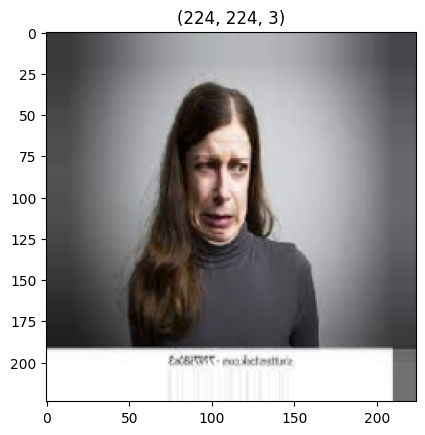

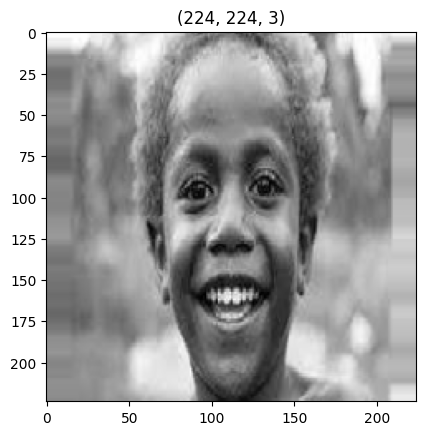

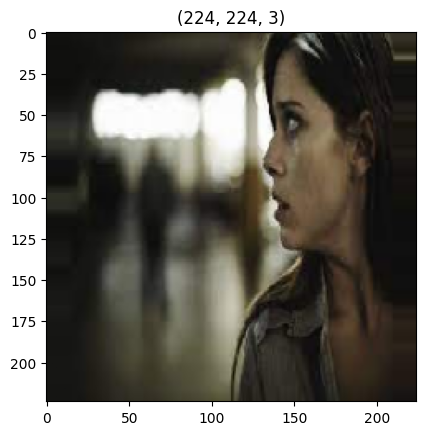

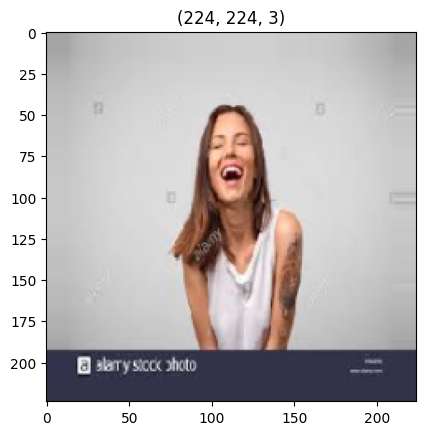

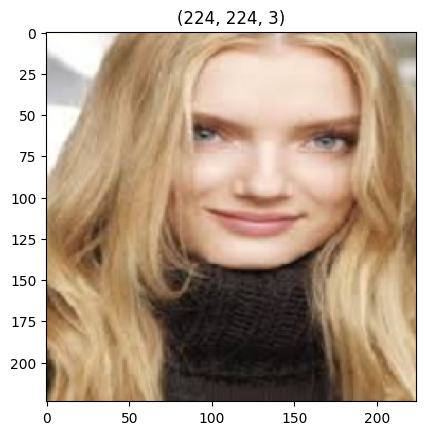

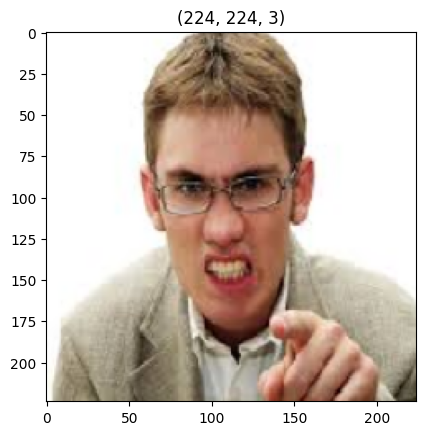

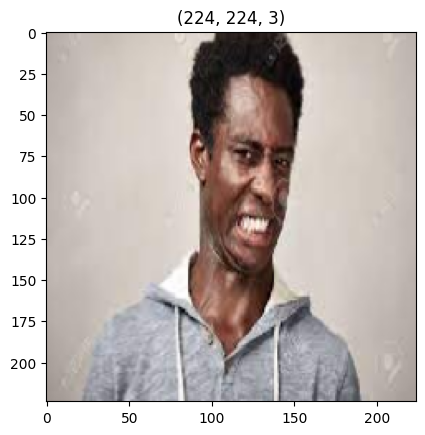

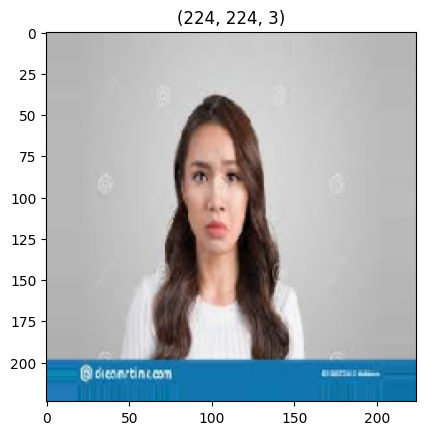

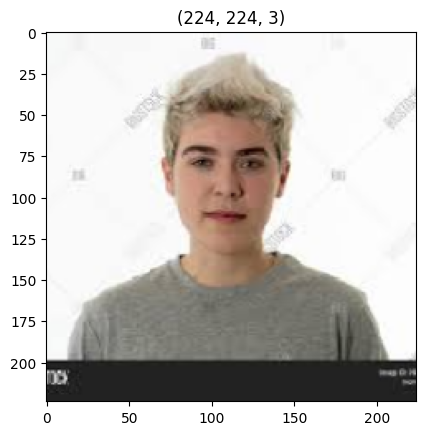

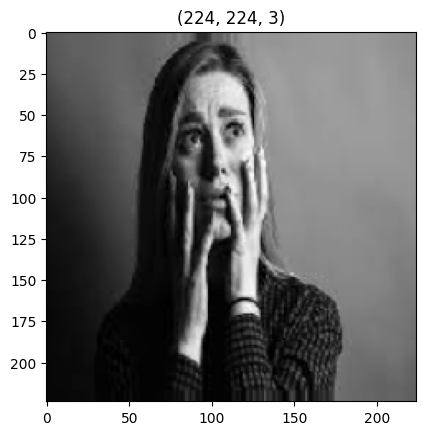

In [11]:
t_img,label=train_data.next()
def plotImages(img_arr,label):
  count=0
  for im,l in zip(img_arr,label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis=False
    plt.show()

    count +=  1
    if count == 10:
      break

plotImages(t_img, label)

In [12]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5,verbose=1,mode='auto')
nc=ModelCheckpoint(filepath="Best_model.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
call_back=[es,nc]

In [13]:

hist=model.fit_generator(train_data,steps_per_epoch=10,epochs=30,validation_data=val_data,validation_steps=8,callbacks=[es,nc])

<ipython-input-13-052780af76cb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_data,steps_per_epoch=10,epochs=30,validation_data=val_data,validation_steps=8,callbacks=[es,nc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 9.8884 - accuracy: 0.2358
Epoch 1: val_accuracy improved from -inf to 0.54688, saving model to Best_model.h5
10/10 [==============================] - 29s 3s/step - loss: 9.8884 - accuracy: 0.2358 - val_loss: 3.4902 - val_accuracy: 0.5469


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.8162 - accuracy: 0.5375
Epoch 2: val_accuracy improved from 0.54688 to 0.64453, saving model to Best_model.h5
10/10 [==============================] - 34s 4s/step - loss: 3.8162 - accuracy: 0.5375 - val_loss: 2.7398 - val_accuracy: 0.6445
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.8040 - accuracy: 0.7075
Epoch 3: val_accuracy improved from 0.64453 to 0.89844, saving model to Best_model.h5
10/10 [==============================] - 37s 4s/step - loss: 1.8040 - accuracy: 0.7075 - val_loss: 0.3892 - val_accuracy: 0.8984
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.6281 - accuracy: 0.8679
Epoch 4: val_accuracy improved from 0.89844 to 0.91797, saving model to Best_model.h5
10/10 [==============================] - 27s 3s/step - loss: 0.6281 - accuracy: 0.8679 - val_loss: 0.3593 - val_accuracy: 0.9180
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.506

In [14]:
from keras.models import load_model
model=load_model("/content/Best_model.h5")

In [15]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

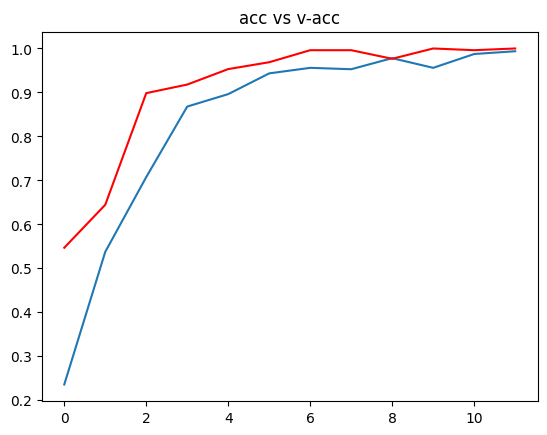

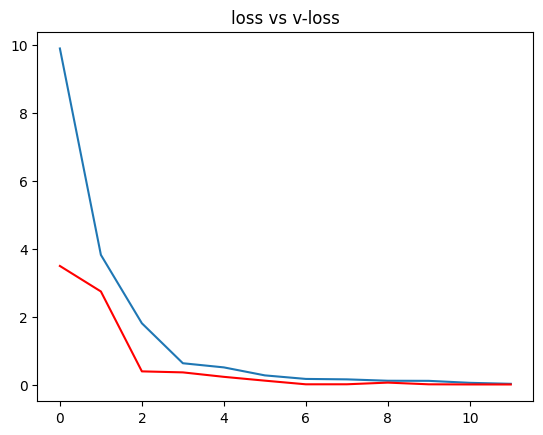

In [16]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [17]:
op=dict(zip(train_data.class_indices.values(),train_data.class_indices.keys()))




1/1 [==============================] - 0s 54ms/step
the image is ofHappy


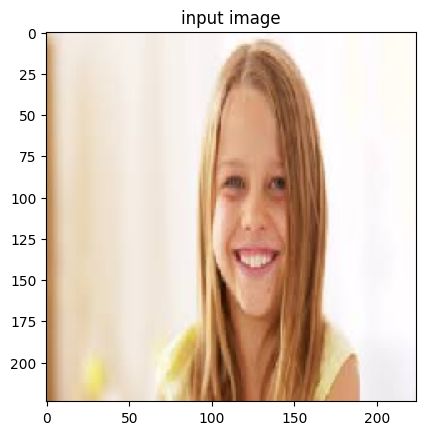

In [43]:
path="/content/images (1).jpg"
img=load_img(path,target_size=(224,224))

i=img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

print(f"the image is of{op[pred]}")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


